In [8]:
%run ./utils.ipynb

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
estado_1 = 'RS'
municipio_1 = '4314902'

In [3]:
estado_2 = 'SP'
municipio_2 = '3550308'

In [4]:
csv_path = "Agregados_por_setores_cor_ou_raca_BR_csv/Agregados_por_setores_cor_ou_raca_BR.csv"

In [30]:
shp_path = f"{estado_1}_setores_CD2022/{estado_1}_setores_CD2022.shp"
merged_df = process_mun(shp_path, csv_path, municipio_1)
print(f'N. de linhas: {merged_df.shape[0]}')
all_segs_city_1 = calculate_seg(merged_df)

N. de linhas: 2744
Dissimilarity: 0.36938877371482537
Spatial Dissimilarity: 0.2862184030564052
Gini: 0.48854095748836385
Entropy: 0.12980799191107342
Isolation: 0.36469467525756316
Dist. Decay Isolation: 0.32391461781522224
Rel. Concentration: -0.10650809891200008
Rel. Centralization: -0.10156531362133592
Rel. Clustering: 0.5956711862979596


In [31]:
shp_path = f"{estado_2}_setores_CD2022/{estado_2}_setores_CD2022.shp"
merged_df = process_mun(shp_path, csv_path, municipio_2)
print(f'N. de linhas: {merged_df.shape[0]}')
all_segs_city_2 = calculate_seg(merged_df)

N. de linhas: 27301
Dissimilarity: 0.3398172360204867
Spatial Dissimilarity: 0.2348804947548332
Gini: 0.45562522324826166
Entropy: 0.12483947527466109
Isolation: 0.5233691348393611
Dist. Decay Isolation: 0.48471768954446676
Rel. Concentration: -0.020331429031083845
Rel. Centralization: -0.3029313482466023
Rel. Clustering: 0.289159771315173


In [32]:
# Teste forçando a qtd. census tract ser a mesma em ambas as cidades
merged_df = merged_df.sample(n = 2744)
all_segs_city_2 = calculate_seg(merged_df)

Dissimilarity: 0.34230846103978074
Spatial Dissimilarity: 0.236230861347071
Gini: 0.45982223749953005
Entropy: 0.12774096102117266
Isolation: 0.5251151277411599
Dist. Decay Isolation: 0.4854798721215636
Rel. Concentration: 0.07027231533642714
Rel. Centralization: -0.30425380482677156
Rel. Clustering: 0.2649858290018958


# Dissimilarity

In [33]:
DS_composition = decomposition.DecomposeSegregation(all_segs_city_1[0], all_segs_city_2[0])
print(f'Spatial Component: {DS_composition.c_s}')
print(f'Attribute Component: {DS_composition.c_a}')
print(f'Spatial Share (%): {abs(DS_composition.c_s) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')
print(f'Attribute Share (%): {abs(DS_composition.c_a) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')

Spatial Component: 0.03739247300214635
Attribute Component: -0.010312160327101721
Spatial Share (%): 0.7838331497921973
Attribute Share (%): 0.21616685020780274


<Axes: title={'center': 'Spatial Component = 0.037, Attribute Component: -0.01'}, xlabel='group_composition', ylabel='Proportion'>

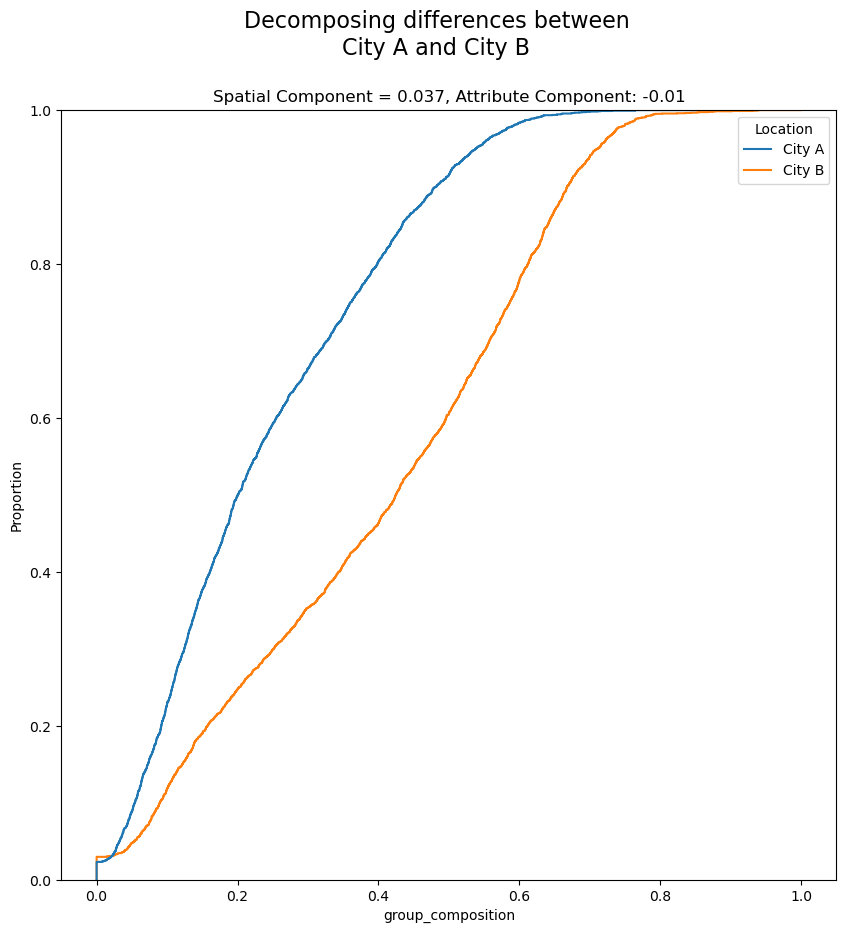

In [34]:
DS_composition.plot(plot_type = 'cdfs')

array([[<Axes: title={'center': 'City A\nOriginal Composition'}>,
        <Axes: title={'center': 'City B\nCounterfactual Composition'}>],
       [<Axes: title={'center': 'City A\nCounterfactual Composition'}>,
        <Axes: title={'center': 'City B\nOriginal Composition'}>]],
      dtype=object)

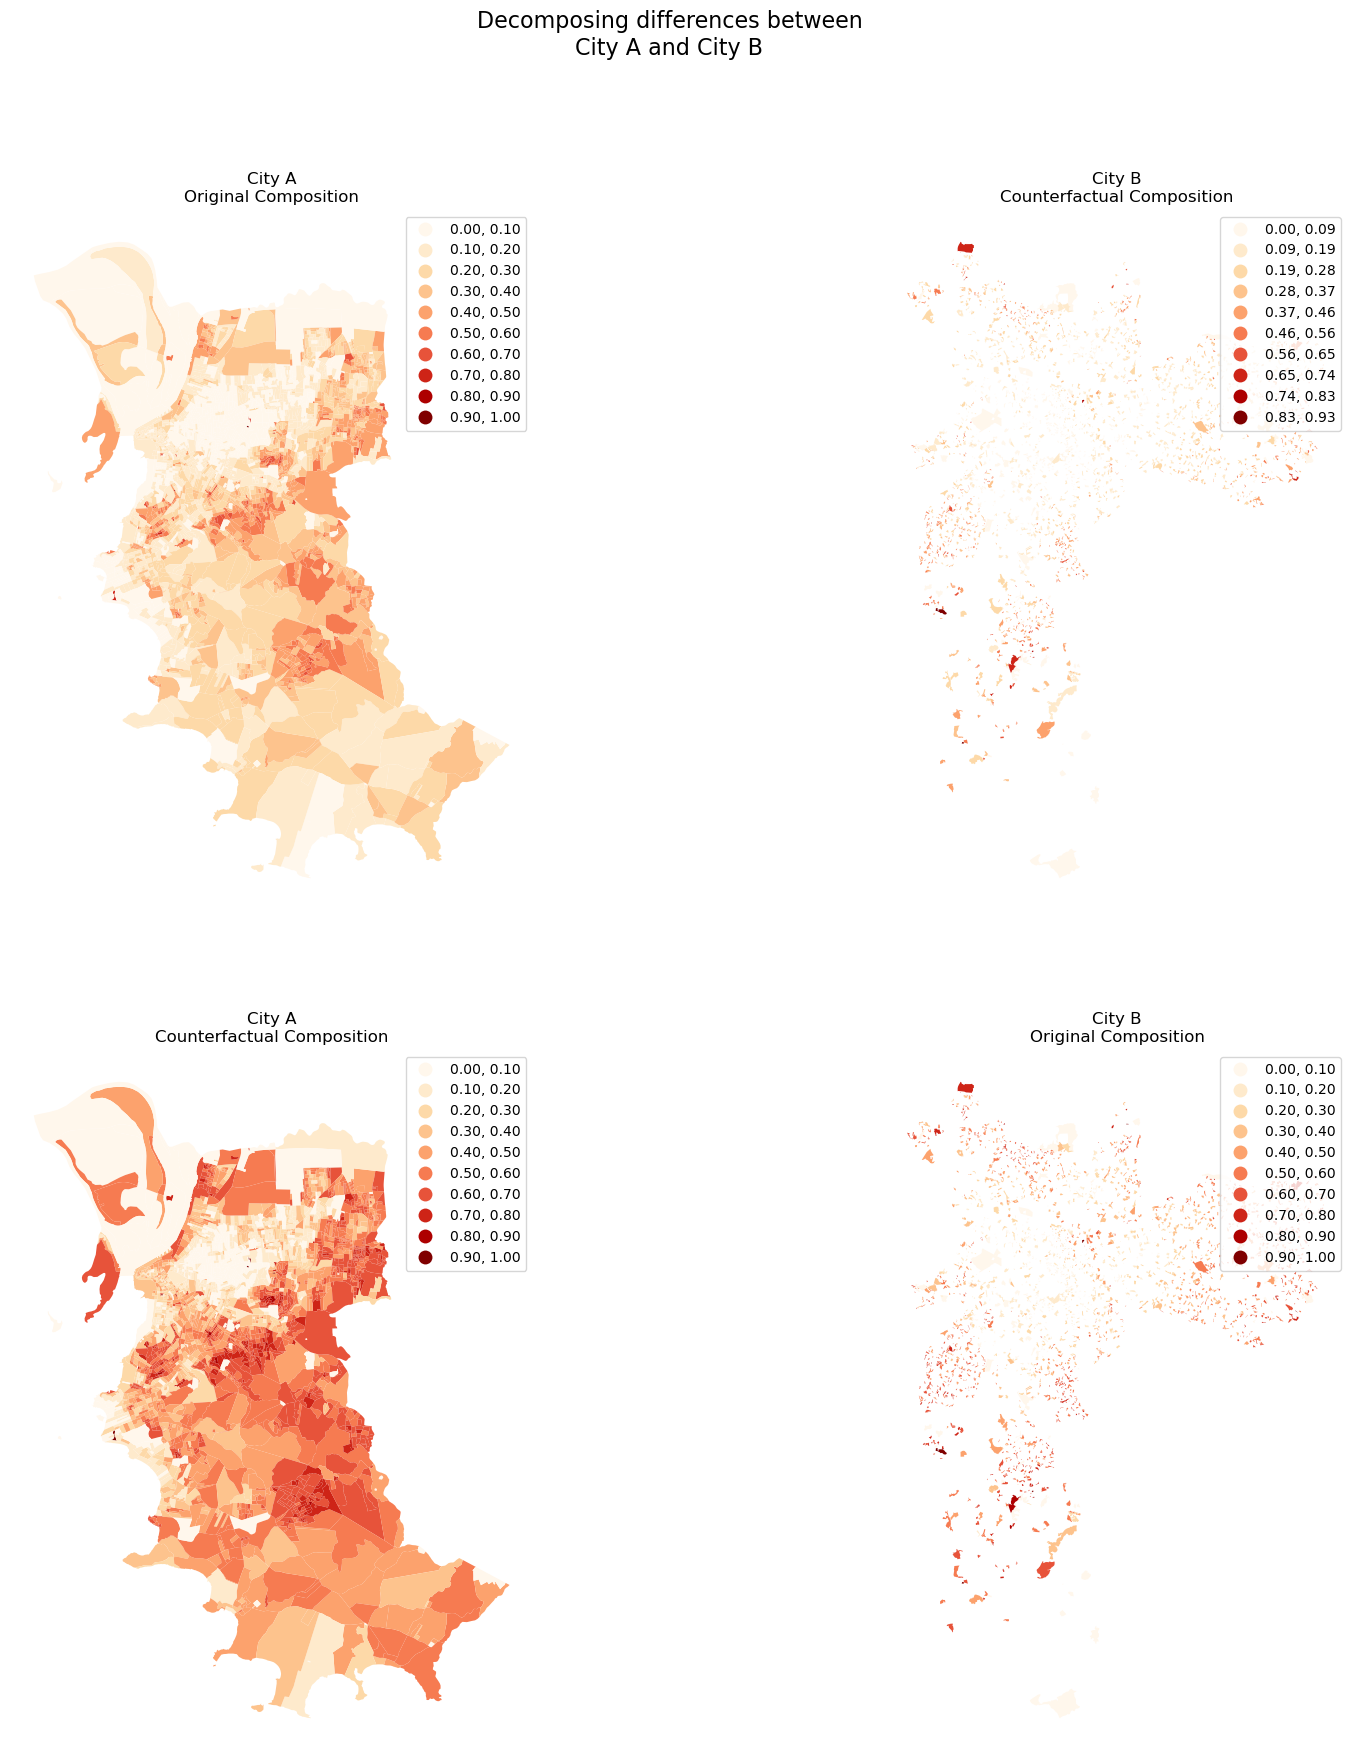

In [35]:
DS_composition.plot(plot_type = 'maps')

# Spatial Dissimilarity

In [36]:
DS_composition = decomposition.DecomposeSegregation(all_segs_city_1[1], all_segs_city_2[1])
print(f'Spatial Component: {DS_composition.c_s}')
print(f'Attribute Component: {DS_composition.c_a}')
print(f'Spatial Share (%): {abs(DS_composition.c_s) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')
print(f'Attribute Share (%): {abs(DS_composition.c_a) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')

Spatial Component: 0.032224877805927254
Attribute Component: 0.017762663903406972
Spatial Share (%): 0.6446581828989976
Attribute Share (%): 0.35534181710100243


# Changing Counterfactual approach

In [46]:
DS_composition = decomposition.DecomposeSegregation(all_segs_city_1[0], all_segs_city_2[0], counterfactual_approach = 'share')
print(f'Spatial Component: {DS_composition.c_s}')
print(f'Attribute Component: {DS_composition.c_a}')
print(f'Spatial Share (%): {abs(DS_composition.c_s) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')
print(f'Attribute Share (%): {abs(DS_composition.c_a) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')

Spatial Component: -0.00473171935960312
Attribute Component: 0.03181203203464775
Spatial Share (%): 0.12948094213303793
Attribute Share (%): 0.870519057866962


array([[<Axes: title={'center': 'City A\nOriginal Composition'}>,
        <Axes: title={'center': 'City B\nCounterfactual Composition'}>],
       [<Axes: title={'center': 'City A\nCounterfactual Composition'}>,
        <Axes: title={'center': 'City B\nOriginal Composition'}>]],
      dtype=object)

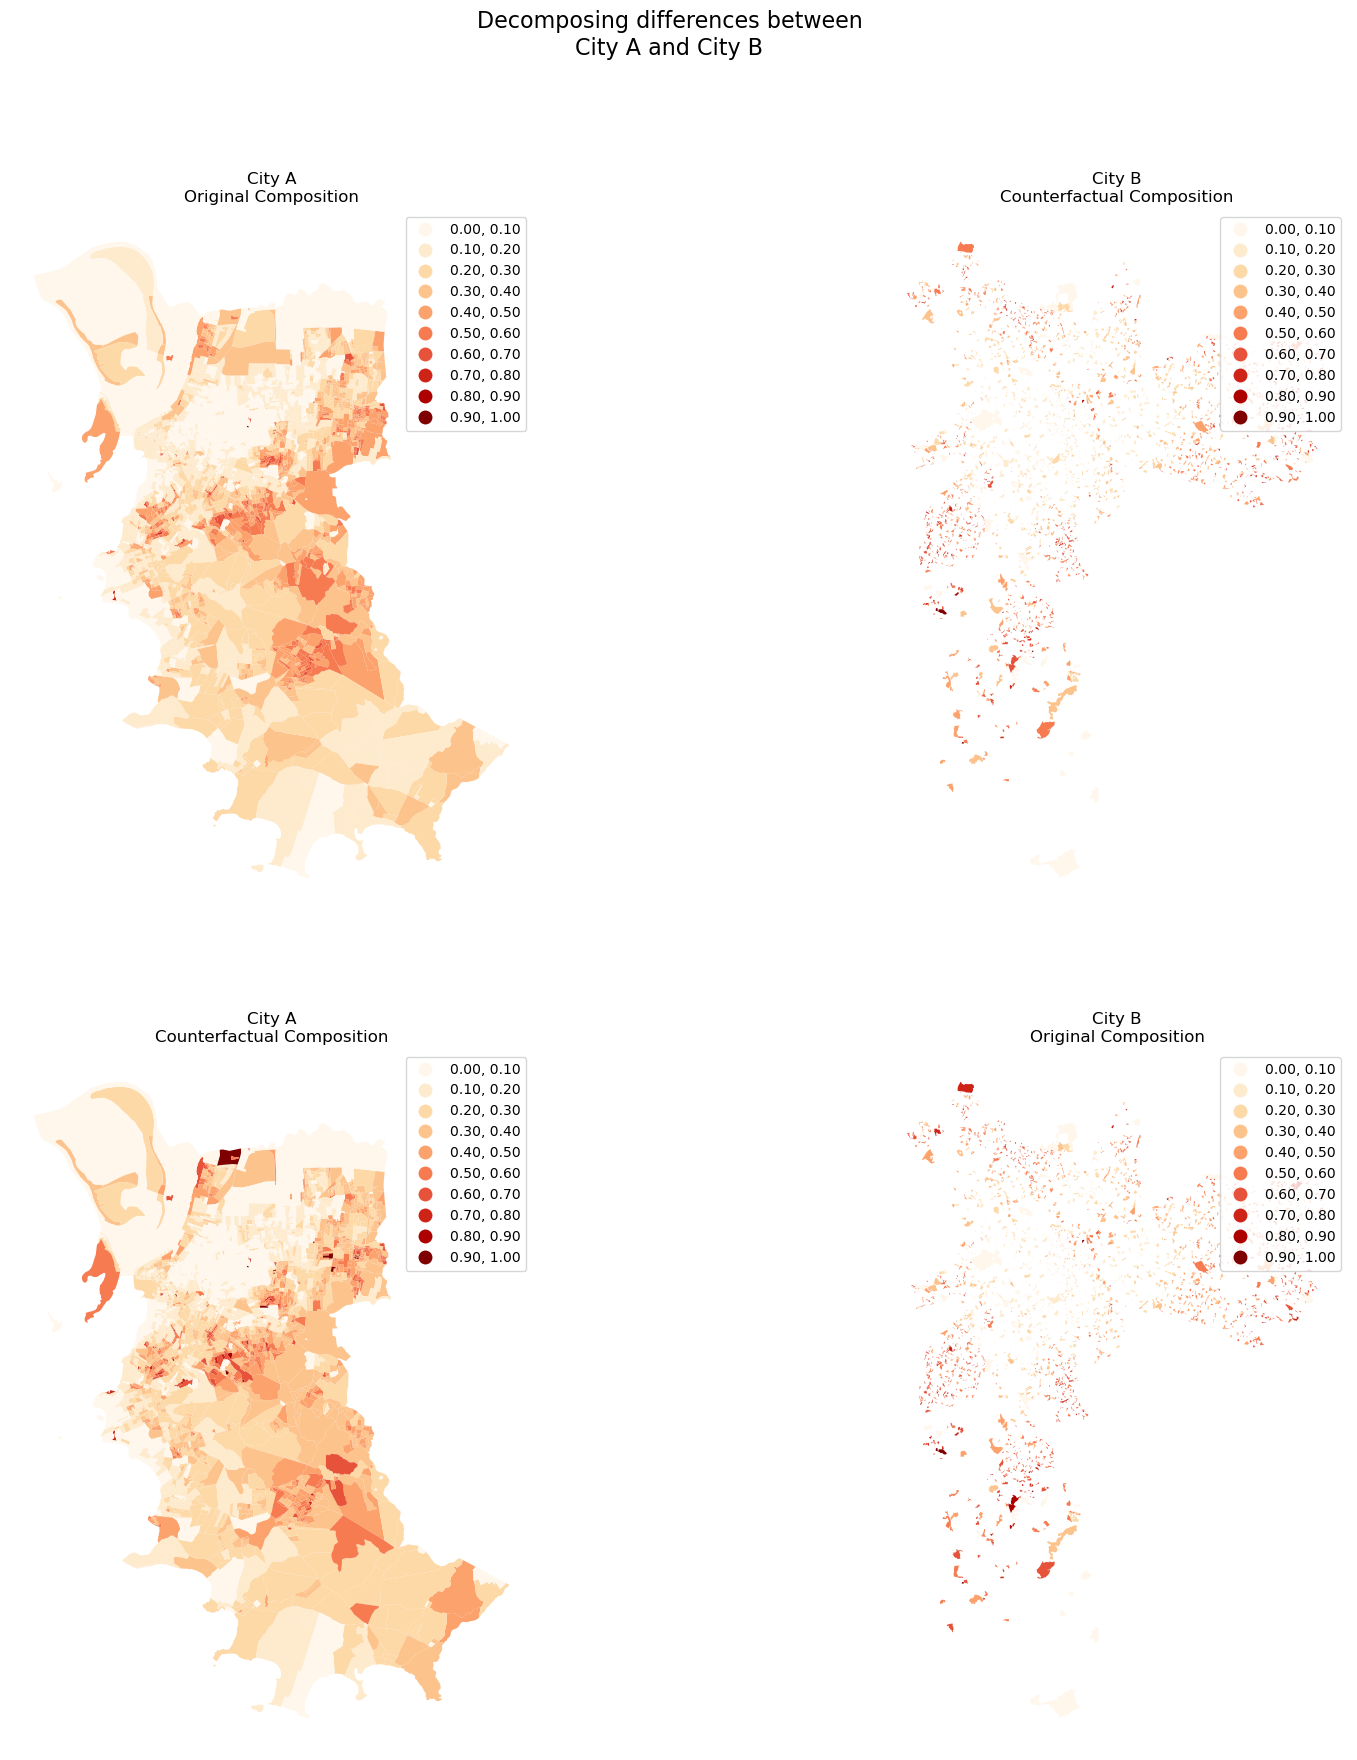

In [47]:
DS_composition.plot(plot_type = 'maps')

In [48]:
DS_composition = decomposition.DecomposeSegregation(all_segs_city_1[1], all_segs_city_2[1], counterfactual_approach = 'share')
print(f'Spatial Component: {DS_composition.c_s}')
print(f'Attribute Component: {DS_composition.c_a}')
print(f'Spatial Share (%): {abs(DS_composition.c_s) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')
print(f'Attribute Share (%): {abs(DS_composition.c_a) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')

Spatial Component: 0.014852704313044335
Attribute Component: 0.03513483739628989
Spatial Share (%): 0.2971281204306727
Attribute Share (%): 0.7028718795693273


In [49]:
DS_composition = decomposition.DecomposeSegregation(all_segs_city_1[0], all_segs_city_2[0], counterfactual_approach = 'dual_composition')
print(f'Spatial Component: {DS_composition.c_s}')
print(f'Attribute Component: {DS_composition.c_a}')
print(f'Spatial Share (%): {abs(DS_composition.c_s) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')
print(f'Attribute Share (%): {abs(DS_composition.c_a) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')

Spatial Component: 0.039539888651290794
Attribute Component: -0.012459575976246168
Spatial Share (%): 0.7603903027561548
Attribute Share (%): 0.23960969724384518


array([[<Axes: title={'center': 'City A\nOriginal Composition'}>,
        <Axes: title={'center': 'City B\nCounterfactual Composition'}>],
       [<Axes: title={'center': 'City A\nCounterfactual Composition'}>,
        <Axes: title={'center': 'City B\nOriginal Composition'}>]],
      dtype=object)

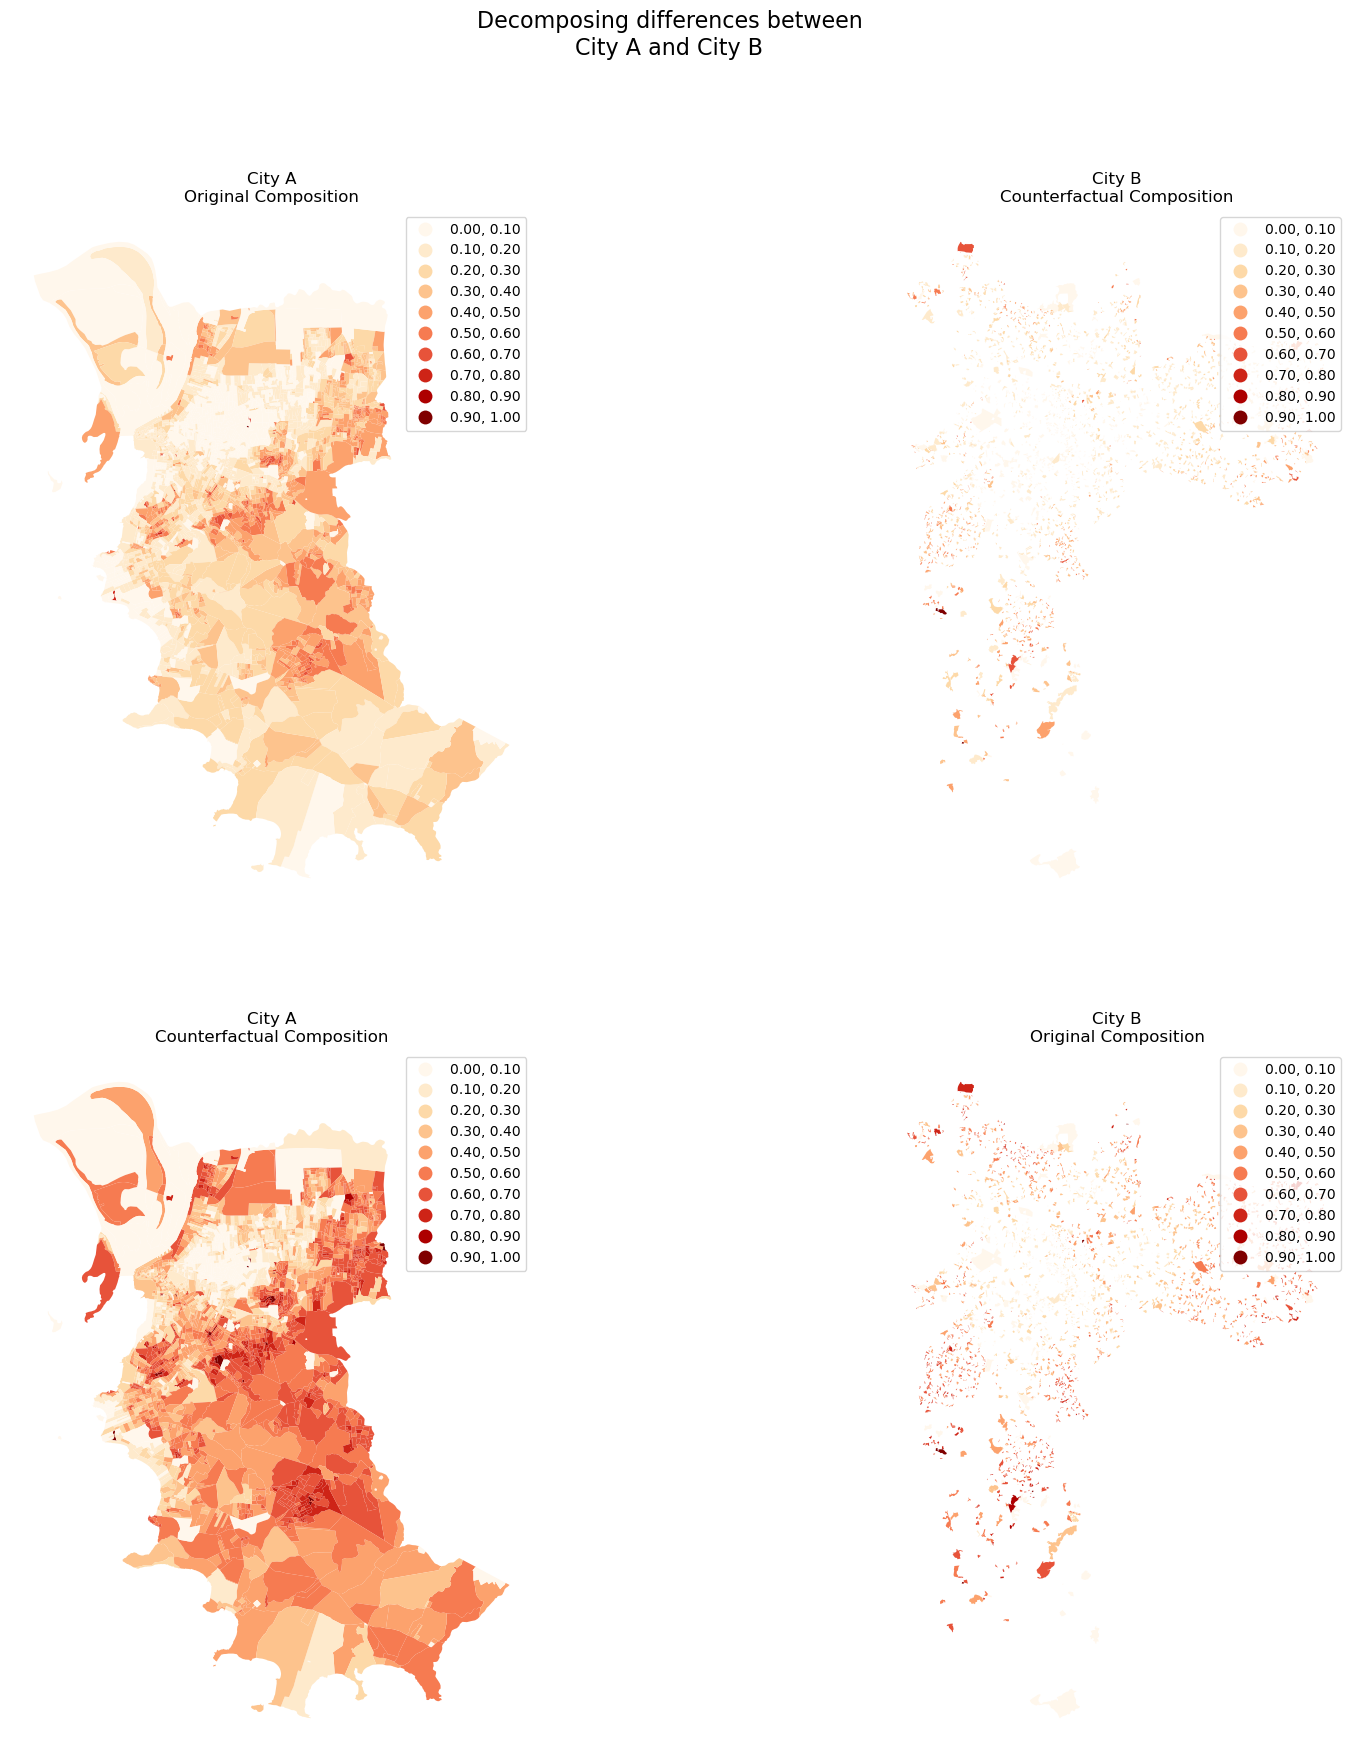

In [50]:
DS_composition.plot(plot_type = 'maps')

In [51]:
DS_composition = decomposition.DecomposeSegregation(all_segs_city_1[1], all_segs_city_2[1], counterfactual_approach = 'dual_composition')
print(f'Spatial Component: {DS_composition.c_s}')
print(f'Attribute Component: {DS_composition.c_a}')
print(f'Spatial Share (%): {abs(DS_composition.c_s) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')
print(f'Attribute Share (%): {abs(DS_composition.c_a) / (abs(DS_composition.c_s) + abs(DS_composition.c_a))}')

Spatial Component: 0.03269082989620084
Attribute Component: 0.017296711813133386
Spatial Share (%): 0.653979547269804
Attribute Share (%): 0.34602045273019605
